# Численное дифференцирование

In [34]:
eps = 1

while 1 + eps/2 != 1:
    eps = eps/2
print ('machine epsilon =', eps)

machine epsilon = 2.220446049250313e-16


In [35]:
import math
e = math.e
sin = math.sin

def f(x):
    return e**sin(x)

def df(f, x, h):
    return (f(x + h) - f(x)) / h

df(f, 2, 1e-5)

-1.0331260052787172

<IPython.core.display.Javascript object>


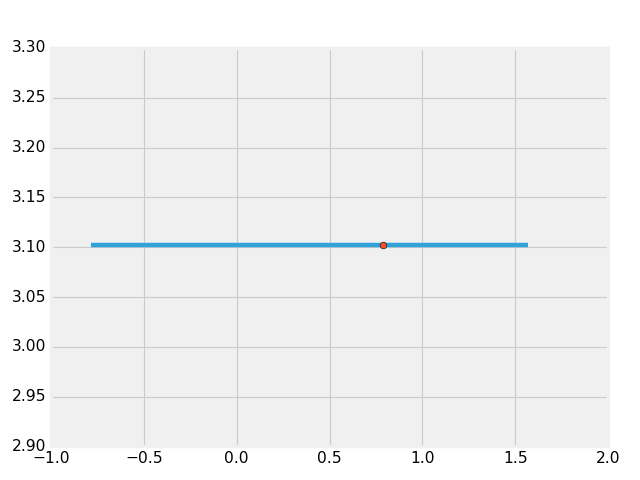

In [36]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
    
import cmath

h = 10**(-8)
def f_clex (x):
    f_x = 2**(1/2)*math.e**(math.pi/4)
    return f_x 

def f_clex2 (x,h):
    z = f_clex(x + h*1j) 
    f_x2 = z.imag/h
    return f_x2 

xx = np.linspace(-cmath.pi/4, cmath.pi/2, num=80)
plt.plot(xx, [f_clex(x) for x in xx])    
plt.plot (cmath.pi/4, f_clex (cmath.pi/4), 'o-')

In [37]:
def f_clex2 (x,h):
    z = f_clex(x + h*1j) #x + hj
    f_x2 = z.imag/h
    return f_x2 
print (f_clex2(cmath.pi/4,h))

0.0


In [38]:
h = 10**(-8)
def f_clex (x):
    f_x = x **x*3
    print (f_x)
    return f_x 
def f_clex2 (x,h):
    z = f_clex(x + h*1j) #x + hj
    print(z)
    f_x2 = z.imag/h
    return f_x2 
print ('Derrivative is ',f_clex2(1,h))

(3+3.0000000000000004e-08j)
(3+3.0000000000000004e-08j)
Derrivative is  3.0000000000000004


<IPython.core.display.Javascript object>


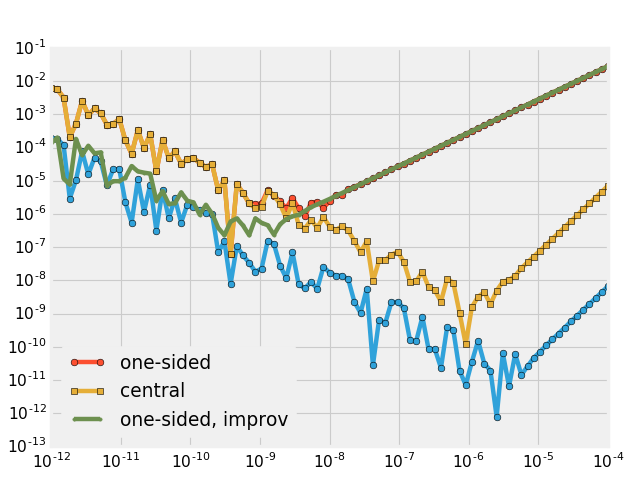

In [39]:
import math
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def f(x):
    if x == 0:
        y = 0
    else:
        y = x**2*math.log(x)
    
    return y

x0 = 1
if x0 == 0: 
    real = 0 
else:
    real = 2*x0*math.log(x0)+x0

    
    
def f1(x, h):
    x1 = x + h
    x2 = x + 2 * h
    df = -3 / 2 * f(x) + 2 * f(x1) - 1 / 2 * f(x2)
    return df / h


hh = np.logspace(-12, -4, 91)

plt.loglog(hh, [abs(f1(x0, h) - real) for h in hh], 'o-')

In [40]:
import math
e = math.e
sin = math.sin
for x in range(1,3):
    res = e**sin(x)
    print(res)

2.319776824715853
2.4825777280150003


### Кривизна

Предполагая дифференцируемую функцию достаточно гладкой, разложим ее в ряд Тейлора в окрестности точки $x$:

$$ f(x + h) = f(x) + f'(x)\, h + f''(x)\, \dfrac{h^2}{2} + f'''(x) \frac{h^3}{6}  + O(h^4) $$

Отсюда для односторонней схемы имеем:


$$ \frac{f(x + h) - f(x)}{h} = \color{red}{f'(x)} + \frac{f''(x)}{2} h + O(h^2)$$

Аналогично, для двухточечной центральной схемы

$$
\frac{f(x + h) - f(x -h)}{2 h} = \color{red}{f'(x)} + \frac{f'''(x)}{6} h^2 + O(h^3)
$$

### Чему равен *шаг разностной схемы*?

In [41]:
h1 = np.logspace(-14, -4, 21)

((x0 + h1) - x0) / h1 - 1.0

array([ -7.99277837e-04,  -2.92329492e-03,  -7.99277837e-04,
        -1.14628149e-04,   8.89005823e-05,   2.58051894e-05,
         8.27403710e-08,  -2.28147836e-06,   8.27403710e-08,
        -1.74978280e-07,   8.27403710e-08,  -3.45449412e-08,
        -6.07747097e-09,   5.63393554e-10,   5.83867177e-10,
        -1.38773215e-10,  -8.22666379e-11,   1.66022751e-12,
         6.55120402e-12,   1.66000547e-12,  -1.10134124e-13])

In [42]:
def deriv_1(f, x0, h):
    x1 = x0 + h
    dx = x1 - x0
    df = f(x1) - f(x0)
    return df / dx

In [43]:
x0 = 1.2

plt.loglog(hh, [abs(deriv(f11, x0, h) - exact) for h in hh], 'o-', label='one-sided')
plt.loglog(hh, [abs(deriv2(f11, x0, h) - exact) for h in hh], 's-', label='central')
plt.loglog(hh, [abs(deriv_1(f11, x0, h) - exact) for h in hh], '.-', label='one-sided, improv')
plt.legend(loc='best')

### Погрешности округления

Рассмотрим одностороннюю двухточечную схему 

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

считая, что значения функции $f(x)$ вычислены с относительной погрешностью $\epsilon_f$. Тогда погрешность округления составляет

$$
\epsilon_r \sim \epsilon_f \left|\frac{f(x)}{h} \right|
$$

Комбинируя эту оценку с оценкой ошибки линеаризации, имеем 

$$
\epsilon_r + \epsilon_t \sim \epsilon_f \frac{f}{\color{red}{h}} + f'' \color{red}{h}\;.
$$

Т.е. суммарная погрешность имеет минимум, достигающийся при шаге дифференцирования порядка 

$$
h \sim \sqrt{\epsilon_f} \sqrt{f / f''} \;.
$$

Заметим, что минимальное значение суммарной погрешности имеет порядок $\epsilon_f^{1/2}$.

Аналогично, для центральной разностной схемы

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} \;,
$$

отброшенные члены ряда Тейлора имеют порядок $O(h^2)$, cледовательно оптимальный шаг 

$$
h \sim \epsilon_f^{\color{red}{1/3}} \;.
$$


## (Локальные) выводы

- Шаг и знаменатель разностной схемы должны быть согласованы.


- Оптимальный шаг схемы нужно шкалировать с "правильной" степенью погрешности вычисления функции: для метода порядка $O(h^d)$, $$h_\mathrm{opt} \sim \epsilon_f^{1/(d+1)}\, x_c\,.$$ Здесь $x_c$  --- "характерный" масштаб изменения функции. (Простейшая эвристика: $x_c = \max{(1, x)}$)


- Для схемы порядка $O(h^d)$, точность оценки производной в лучшем случае $ \sim \epsilon_f^{d/(d+1)}$. 

## Схемы высших порядков


B. Fornberg, _Generation of finite difference formulas on arbitrary spaced grids_, Mathematics of Computation **51**, 669 (1988).

Таблицы воспроизведены, в т.ч. https://en.wikipedia.org/wiki/Finite_difference_coefficient

Например, односторонняя схема второго порядка для первой производной:

$$
f'(x) = \frac{ -\frac{3}{2} f(x) + 2 f(x+h) -\frac{1}{2} f(x + 2h) }{h} + O(h^2)
$$


## Экстраполяция Ричардсона

Рассмотрим величину $Z(h) = Z_* + K h^\alpha$. Предположим, что мы можем вычислять $Z(h)$ для различных значений $h > 0$, и что задача состоит в том, чтобы вычислить $Z_*$.

Тогда
$$
\left\{
%
\begin{aligned}
Z(h) &= Z_* + K\, h^\alpha \\
Z\left(\frac{h}{q}\right) &= Z_* + K \left(\frac{h}{q} \right)^\alpha
\end{aligned}
%
\right.
$$

и

$$
\frac{q^\alpha Z\left(\frac{h}{q}\right) - Z(h)}{q^\alpha -1} = Z_*
$$


Рассмотрим центральную разностную схему второго порядка для функции $f(x)$, 

$$
\begin{aligned}
Z_h &= \frac{f(x + h) - f(x - h)}{2\,h} \\
    &= f'(x) + K_2 h^2 + K_4 h^4 + \dots \;,
\end{aligned}
$$

причем коэффициенты $K_s$ не зависят от $h$.

Схема $Z_h$ имеет порядок $O(h^2)$. Ричардсоновский эктраполянт 
$$
Z^{(2)}_h = \frac{q^2 Z_{h/q} - Z_h}{q^2 - 1}
$$
имеет порядок $O(h^4)$. Аналогично, cхема

$$
Z^{(4)}_h = \frac{q^4 Z^{(2)}_{h/q} - Z^{(2)}_h }{q^4 - 1}
$$
имеет порядок $O(h^6)$.


При использовании экстраполяции Ричарсона высоких порядков встает вопрос организации вычислений. Стандартный способ (иногда называемый алгоритом Невилла) основывается на построении верхне-треугольной матрицы конечных разностей:

\begin{array}{cccccс}
Z_h &          & Z_{h/2}   &          & Z_{h/4} & \cdots \\
    & \nwarrow &  \uparrow & \nwarrow & \uparrow & \cdots \\
    && \dfrac{2^2 Z_{h/2} - Z_h}{2^2 -1} & &  \dfrac{2^2 Z_{h/4} - Z_{h/2}}{2^2 - 1} & \cdots\\
    &&& \cdots &
\end{array}

(здесь для иллюстрации взято $q=2$.) Вычисления начинаются из левого верхнего угла таблицы и производятся столбец за столбцом. Заметим, что в каждом столбце вычисление дифференцируемой функции необходимо только в первой строке --- прочие элементы матрицы вычисляются как линейные комбинации уже имеющихся величин, как показано стрелками.

Заметим также, что $n$-я строка таблицы дает значения оценки $f'(x)$ для набора последовательно уменьшающихся шагов разностной схемы. Разность между последовательными приближениями разных порядков можно использовать для оценки погрешности результата. 

Особое внимание следует обратить на контроль погрешностей и критерий остановки вычисления. Вычисления нужно остановить когда ошибка перестает уменьшаться (например, когда ошибка текущего приближения превышает ошибку лучшего из прошлых приближений в два раза).

## Дифференцирование с комплексным шагом

J. N. Lyness, C. B. Moler, _Numerical differentiation of analytic functions_, SIAM J. Numerical Analysis **4**, 202 (1967).

http://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/

Предположим, что функция $f(x)$ может быть продолжена в комплексную плоскость, и результат, $f(z) = u(x, y) + i v(x, y)$, является аналитической функцией переменной $z = x + iy$. Тогда, согласно условиям Коши-Римана:

$$
\frac{\partial u }{\partial x} = \frac{\partial v}{\partial y}
$$

В точке $z = x + i\,0$,

\begin{align}
\frac{df}{dx} &\equiv \left. \frac{\partial u}{\partial x} \,\right|_{(x, 0)} \\
              &= \frac{\partial v}{\partial y} \\
              &= \lim_{h\to 0} \frac{v(x, h) - v(x, 0)}{h} \qquad\qquad (v(x, 0)\equiv 0)\\
              &\equiv \lim_{h\to 0} \frac{\mathrm{Im}\,{f(x + ih)}}{h}
\end{align}

Разложим $f(z)$ в ряд Тейлора в окрестности точки $x + i\,0$

$$f(x + ih) = f(x) + f'(x)\, ih + \frac{f''(x)}{2} \, (-h^2) + \frac{f'''(x)}{6} \, (-ih^3) + \dots$$

Отделяя мнимую часть, получаем

$$
f'(x) = \frac{ \mathrm{Im}\,f(x+ih) }{h} + O(h^2)
$$


# Вопросы для практических занятий и самостоятельной работы

1. Написать программу, оценивающую значение *машинного эпсилон* для стандартных чисел с двойной точностью.

2. Привести пример функции, производную которой нельзя вычислить методом дифференцирования с комплексным шагом.

3. Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.

4. Прямым вычислением показать, что один шаг экстраполяции Ричардсона для центральной схемы вычисления первой производной воспроизводит явную форму разностной схемы порядка $O(h^4)$. 

5. Написать программу, вычисляющую производную функции $x^2 \ln x$ в точке $x = 0$ с точностью $O(h^2)$.

6. Написать программу, вычисляющую градиент функции $N$ переменных.

7. (*) Релизовать алгоритм вычисления первой производной с помощью экстраполяции Ричардсона. Использовать стандартную центральную схему. Обсудить способы оценки погрешности вычислений и критерии остановки итерационного процесса.
